**Import Tensorflow as Neural Network package**

In [1]:
import pandas as pd
import random 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

np.random.seed(11)
random.seed(11)

In [2]:
Data = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/50CombLagged.csv")
Target = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50CombLagged/TargetOutliersTreated.csv")

In [3]:
Target.head()

#Data.drop(columns = ['Datum'], inplace = True)
Data.head()


,pm10_stundenmittelwerte_ug_m3,pm2_5_stundenmittelwerte_ug_m3,PM10 [ug/m3],PM2.5 [ug/m3],NO2 [ug/m3],NOX [ug/m3 eq. NO2],no2_stundenmittelwerte_ug_m3,CPC [1/cm3],Basel Wind Direction [10 m],Basel Wind Speed [10 m],...,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour,PM10_1h_lag,PM10_2h_lag,PM10_24h_lag
0,0.371266,0.764582,0.584737,1.069597,1.257089,1.099745,-0.244192,0.510222,-0.072930,-0.274121,...,-0.066647,-0.899970,-0.024535,0.180220,-0.797192,-0.524060,0.077300,0.096166,0.010001,5.637085
1,0.277764,0.702844,0.312302,0.826050,1.084973,0.836950,-0.300376,0.216428,-0.072930,-0.274121,...,-0.086139,-0.899970,-0.028848,-0.007550,-0.836568,-0.461916,0.127767,0.017932,0.096179,3.190429
2,0.142528,0.570258,0.244194,0.754418,0.985327,0.774379,-0.321300,0.090215,-0.182476,-0.092406,...,-0.064343,-0.877057,-0.056393,0.257705,-0.803201,-0.190723,0.238667,-0.185601,0.017946,1.511672
3,0.000139,0.468813,0.187437,0.725766,0.930975,0.993376,-0.364429,0.447317,-0.243955,0.085004,...,-0.016326,-0.854702,-0.085834,0.155832,-0.419150,0.571487,0.465321,-0.296032,-0.185588,-0.690209
4,-0.060573,0.395517,0.153382,0.697113,0.822270,1.093488,-0.289886,0.316550,-0.325020,0.157442,...,0.018813,-0.814787,-0.130890,-0.007550,-0.418985,1.439691,0.732485,-0.490289,-0.296019,-1.257621


In [ ]:
n = Data.shape[0]
X = Data.copy()
y = Target["PM10_Combined_Trend_Residual"].copy()

# Split-Größen definieren
train_size = int(n * 0.7)  # 70% Training
val_size = int(n * 0.1)    # 10% Validierung
test_size = n - train_size - val_size  # 20% Test

# Training (älteste Daten)
X_train, y_train = X[:train_size], y[:train_size]

# Validierung (neuere Daten)
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]

# Test (neueste Daten)
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]


In [5]:
tf.random.set_seed(11)

model = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [7]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])


Epoch 1/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 31.0199 - mae: 3.5450 - mse: 28.3567 - val_loss: 19.0481 - val_mae: 2.1648 - val_mse: 16.8415
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10.8151 - mae: 2.1307 - mse: 8.7623 - val_loss: 16.6593 - val_mae: 1.9731 - val_mse: 14.9983
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.4983 - mae: 1.9878 - mse: 7.9423 - val_loss: 15.7417 - val_mae: 1.9596 - val_mse: 14.4466
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.3646 - mae: 1.9152 - mse: 7.1451 - val_loss: 14.9448 - val_mae: 2.0155 - val_mse: 13.9165
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.8467 - mae: 1.8474 - mse: 6.8693 - val_loss: 14.1185 - val_mae: 1.8656 - val_mse: 13.2662
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.3570 - mae: 1.8232 - mse: 6.5367 - val_loss: 14.1222 - val_mae: 1.9354 - val_mse: 13.3759
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.15

In [9]:
results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3233 - mae: 1.3644 - mse: 3.7699  
Test loss, Test MAE: [4.625704288482666, 1.4367337226867676, 4.072358131408691]


In [10]:
tf.random.set_seed(11)

model2 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 36.3949 - mae: 3.9406 - mse: 33.6542 - val_loss: 20.3792 - val_mae: 2.3008 - val_mse: 18.0926
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13.0867 - mae: 2.4122 - mse: 10.9455 - val_loss: 17.6673 - val_mae: 2.0723 - val_mse: 15.9201
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.6922 - mae: 2.3078 - mse: 10.0377 - val_loss: 16.5280 - val_mae: 2.0466 - val_mse: 15.1154
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10.4678 - mae: 2.1972 - mse: 9.1285 - val_loss: 15.6619 - val_mae: 1.9576 - val_mse: 14.5040
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.0059 - mae: 2.1628 - mse: 8.8969 - val_loss: 15.0071 - val_mae: 1.9238 - val_mse: 14.0228
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.9252 - mae: 2.1552 - mse: 8.9744 - val_loss: 14.5490 - val_mae: 1.9400 - val_mse: 13.6875
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.4575 - ma

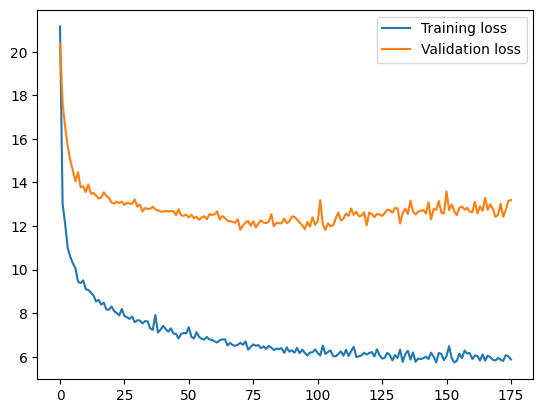

In [11]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# Taking the most promissing values from the last loop

Testing with L2: 0.025, LR: 0.001, Patience: 72, Batch size: 16 -> V1
Testing with L2: 0.01, LR: 0.001, Patience: 72, Batch size: 16 -> V2

In [12]:
tf.random.set_seed(11)

model3 = Sequential([
    Dense(512, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, min_lr=1e-6)



history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)

Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 26.4576 - mae: 3.2206 - mse: 23.5437 - val_loss: 18.4617 - val_mae: 2.1579 - val_mse: 16.1910
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.3857 - mae: 2.0830 - mse: 8.3219 - val_loss: 16.6366 - val_mae: 2.0036 - val_mse: 15.0756
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.1478 - mae: 1.9725 - mse: 7.7050 - val_loss: 15.4511 - val_mae: 1.9426 - val_mse: 14.2870
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1050 - mae: 1.8974 - mse: 7.0130 - val_loss: 14.6830 - val_mae: 1.8915 - val_mse: 13.7499
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7867 - mae: 1.8456 - mse: 6.8943 - val_loss: 14.5115 - val_mae: 1.9031 - val_mse: 13.7156
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.5908 - mae: 1.8491 - mse: 6.8245 - val_loss: 13.9628 - val_mae: 1.9124 - val_mse: 13.2594
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9037 - mae: 1.

825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.2917 - mae: 2.8006 - mse: 19.2867 - val_loss: 14.9597 - val_mae: 3.0737 - val_mse: 14.1035 - learning_rate: 0.0010
Epoch 2/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5636 - mae: 2.0404 - mse: 7.8410 - val_loss: 8.2422 - val_mae: 2.1522 - val_mse: 7.8084 - learning_rate: 0.0010
Epoch 3/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0740 - mae: 2.0293 - mse: 8.6728 - val_loss: 10.2058 - val_mae: 2.4821 - val_mse: 9.9091 - learning_rate: 0.0010
Epoch 4/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0456 - mae: 1.8458 - mse: 6.7611 - val_loss: 11.5418 - val_mae: 2.6741 - val_mse: 11.2898 - learning_rate: 0.0010
Epoch 5/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2041 - mae: 1.7523 - mse: 5.9584 - val_loss: 14.2653 - val_mae: 3.0815 - val_mse: 14.0384 - learning_rate: 0.0010
Epoch 6/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5206 - mae: 1.6532 - mse: 5.2965 - val_loss: 15.4869 - val_mae: 3.1436 - val_mse: 15.2706 - learning_rate: 0.0010
Epoch 7/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2349 - mae: 1.7570 - mse: 6.0151 - val_loss: 13.7594 - val_mae: 2.9506 - val_mse: 13.5450 - learning_rate: 0.0010
Epoch 8/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7316 - mae: 1.6844 - mse: 5.5207 - val_loss: 19.9287 - val_mae: 3.6997 - val_mse: 19.7239 - learning_rate: 0.0010
Epoch 9/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5522 - mae: 1.6580 - mse: 5.3458 - val_loss: 26.9765 - val_mae: 4.3214 - val_mse: 26.7674 - learning_rate: 0.0010
Epoch 10/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5004 - mae: 1.6547 - mse: 5.2929 - val_loss: 16.9995 - val_mae: 3.3162 - val_mse: 16.7938 - learning_rate: 0.0010
Epoch 11/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6889 - mae: 1.6493 - mse: 5.4781 - val_loss: 17.6912 - val_mae: 3.4159 - val_mse: 17.4742 - learning_rate: 0.0010
Epoch 12/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4277 - mae: 1.6239 - mse: 5.2176 - val_loss: 18.3354 - val_mae: 3.4977 - val_mse: 18.1326 - learning_rate: 0.0010
Epoch 13/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9380 - mae: 1.5132 - mse: 4.7404 - val_loss: 19.3301 - val_mae: 3.6291 - val_mse: 19.1460 - learning_rate: 2.5000e-04
...
Epoch 17/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5297 - mae: 1.4443 - mse: 4.3617 - val_loss: 18.6069 - val_mae: 3.5405 - val_mse: 18.4405 - learning_rate: 2.5000e-04
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594]

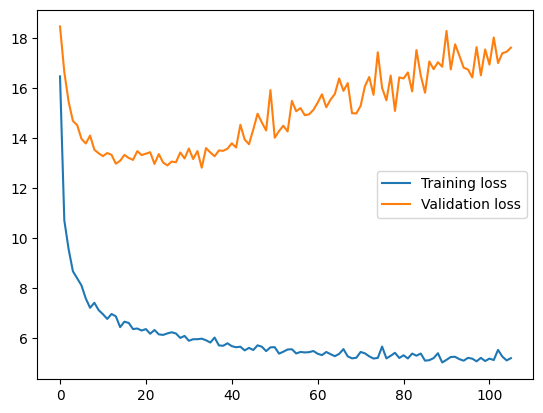

In [13]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


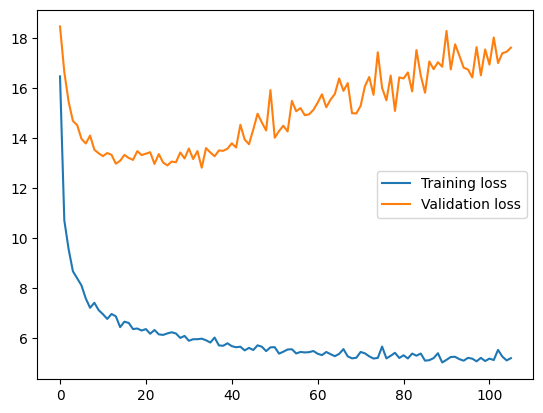

In [14]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [ ]:
tf.random.set_seed(11)

model4 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.15),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)


history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 48.3497 - mae: 4.5156 - mse: 45.3019 - val_loss: 21.2420 - val_mae: 2.3835 - val_mse: 18.8459
Epoch 2/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 9.0150 - mae: 1.8583 - mse: 6.8446 - val_loss: 17.5104 - val_mae: 2.0673 - val_mse: 15.8955
Epoch 3/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 7.4657 - mae: 1.7027 - mse: 5.9846 - val_loss: 15.6947 - val_mae: 1.9335 - val_mse: 14.5231
Epoch 4/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 6.7452 - mae: 1.6459 - mse: 5.6535 - val_loss: 14.6971 - val_mae: 1.8783 - val_mse: 13.7829
Epoch 5/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 6.2712 - mae: 1.6059 - mse: 5.4053 - val_loss: 14.0742 - val_mae: 1.8327 - val_mse: 13.3120
Epoch 6/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 6.0251 - mae: 1.5923 - mse: 5.2944 - val_loss: 13.9151 - val_mae: 1.8481 - val_mse: 13.2535
Epoch 7/800
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 5.933